## Bayesian estimation of enzyme elasticities for an in vitro pathway

This notebook is derived from Wu2004.ipynb. 
Wu2004.ipynb uses a model and data from C. Giersch, European Journal of Biochemistry. 227, 194–201 (1995). 
However, instead of running just one model, this notebook will run analysis for a batch of models. 
This notebook is designed to run within the framework of the following files:
- `generating_synthetic_models.ipynb`
- `generated_model_analysis.ipynb`


In [1]:
# handy-dandy
import os
import sys
from tqdm import tqdm
import warnings
# warnings.filterwarnings("error")
# warnings.resetwarnings()
warnings.filterwarnings('ignore')

# arrays/dataframes
import numpy as np
np.random.seed(0)
np.set_printoptions(threshold=sys.maxsize)

import pandas as pd
pd.set_option
('display.max_columns', None)
pd.set_option('display.max_rows', None)

# math/stats
import scipy
import scipy.stats
import pymc as pm
import aesara
import arviz as az

# biochemical pathway simulators
import cobra
import tellurium as te

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

# linlog Bayesian Metabolic Control Analysis
import emll
from emll.util import initialize_elasticity

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
import inference_utils as bi
# ba.testImport()
FOLDER_NAME = '10sp/'

with open(FOLDER_NAME + "passlist.txt") as file:
    passlist = [line.rstrip() for line in file]

DATA_OMISSION_CODE = 'A'
ADVI_ITERATIONS = 10000 # 30000

In [4]:
# make results folders 
results_dir = './' + FOLDER_NAME + 'results/'
os.mkdir(results_dir)
os.mkdir(results_dir + 'convergence/')
os.mkdir(results_dir + 'elast-hdi/')
os.mkdir(results_dir + 'elast-plot/')
os.mkdir(results_dir + 'FCC-hdi/')
os.mkdir(results_dir + 'FCC-graph/')
os.mkdir(results_dir + 'MCC-hdi/')
os.mkdir(results_dir + 'MCC-graph/')


Model does not contain SBML fbc package information.
Adding exchange reaction EX_B0 with default bounds for boundary metabolite: B0.
Adding exchange reaction EX_B5 with default bounds for boundary metabolite: B5.
Adding exchange reaction EX_B6 with default bounds for boundary metabolite: B6.
Missing lower flux bound set to '-1000.0' for reaction: '<Reaction J0>'
Missing upper flux bound set to '1000.0' for reaction: '<Reaction J0>'
Missing lower flux bound set to '-1000.0' for reaction: '<Reaction J1>'
Missing upper flux bound set to '1000.0' for reaction: '<Reaction J1>'
Missing lower flux bound set to '-1000.0' for reaction: '<Reaction J2>'
Missing upper flux bound set to '1000.0' for reaction: '<Reaction J2>'
Missing lower flux bound set to '-1000.0' for reaction: '<Reaction J3>'
Missing upper flux bound set to '1000.0' for reaction: '<Reaction J3>'
Missing lower flux bound set to '-1000.0' for reaction: '<Reaction J4>'
Missing upper flux bound set to '1000.0' for reaction: '<Reacti

Finished [100%]: Average Loss = 1.0141e+06


Model does not contain SBML fbc package information.
Adding exchange reaction EX_B0 with default bounds for boundary metabolite: B0.
Adding exchange reaction EX_B5 with default bounds for boundary metabolite: B5.
Adding exchange reaction EX_B6 with default bounds for boundary metabolite: B6.
Missing lower flux bound set to '-1000.0' for reaction: '<Reaction J0>'
Missing upper flux bound set to '1000.0' for reaction: '<Reaction J0>'
Missing lower flux bound set to '-1000.0' for reaction: '<Reaction J1>'
Missing upper flux bound set to '1000.0' for reaction: '<Reaction J1>'
Missing lower flux bound set to '-1000.0' for reaction: '<Reaction J2>'
Missing upper flux bound set to '1000.0' for reaction: '<Reaction J2>'
Missing lower flux bound set to '-1000.0' for reaction: '<Reaction J3>'
Missing upper flux bound set to '1000.0' for reaction: '<Reaction J3>'
Missing lower flux bound set to '-1000.0' for reaction: '<Reaction J4>'
Missing upper flux bound set to '1000.0' for reaction: '<Reacti

Finished [100%]: Average Loss = 9.2772e+06


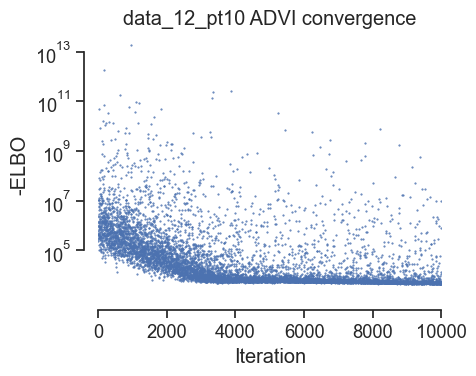

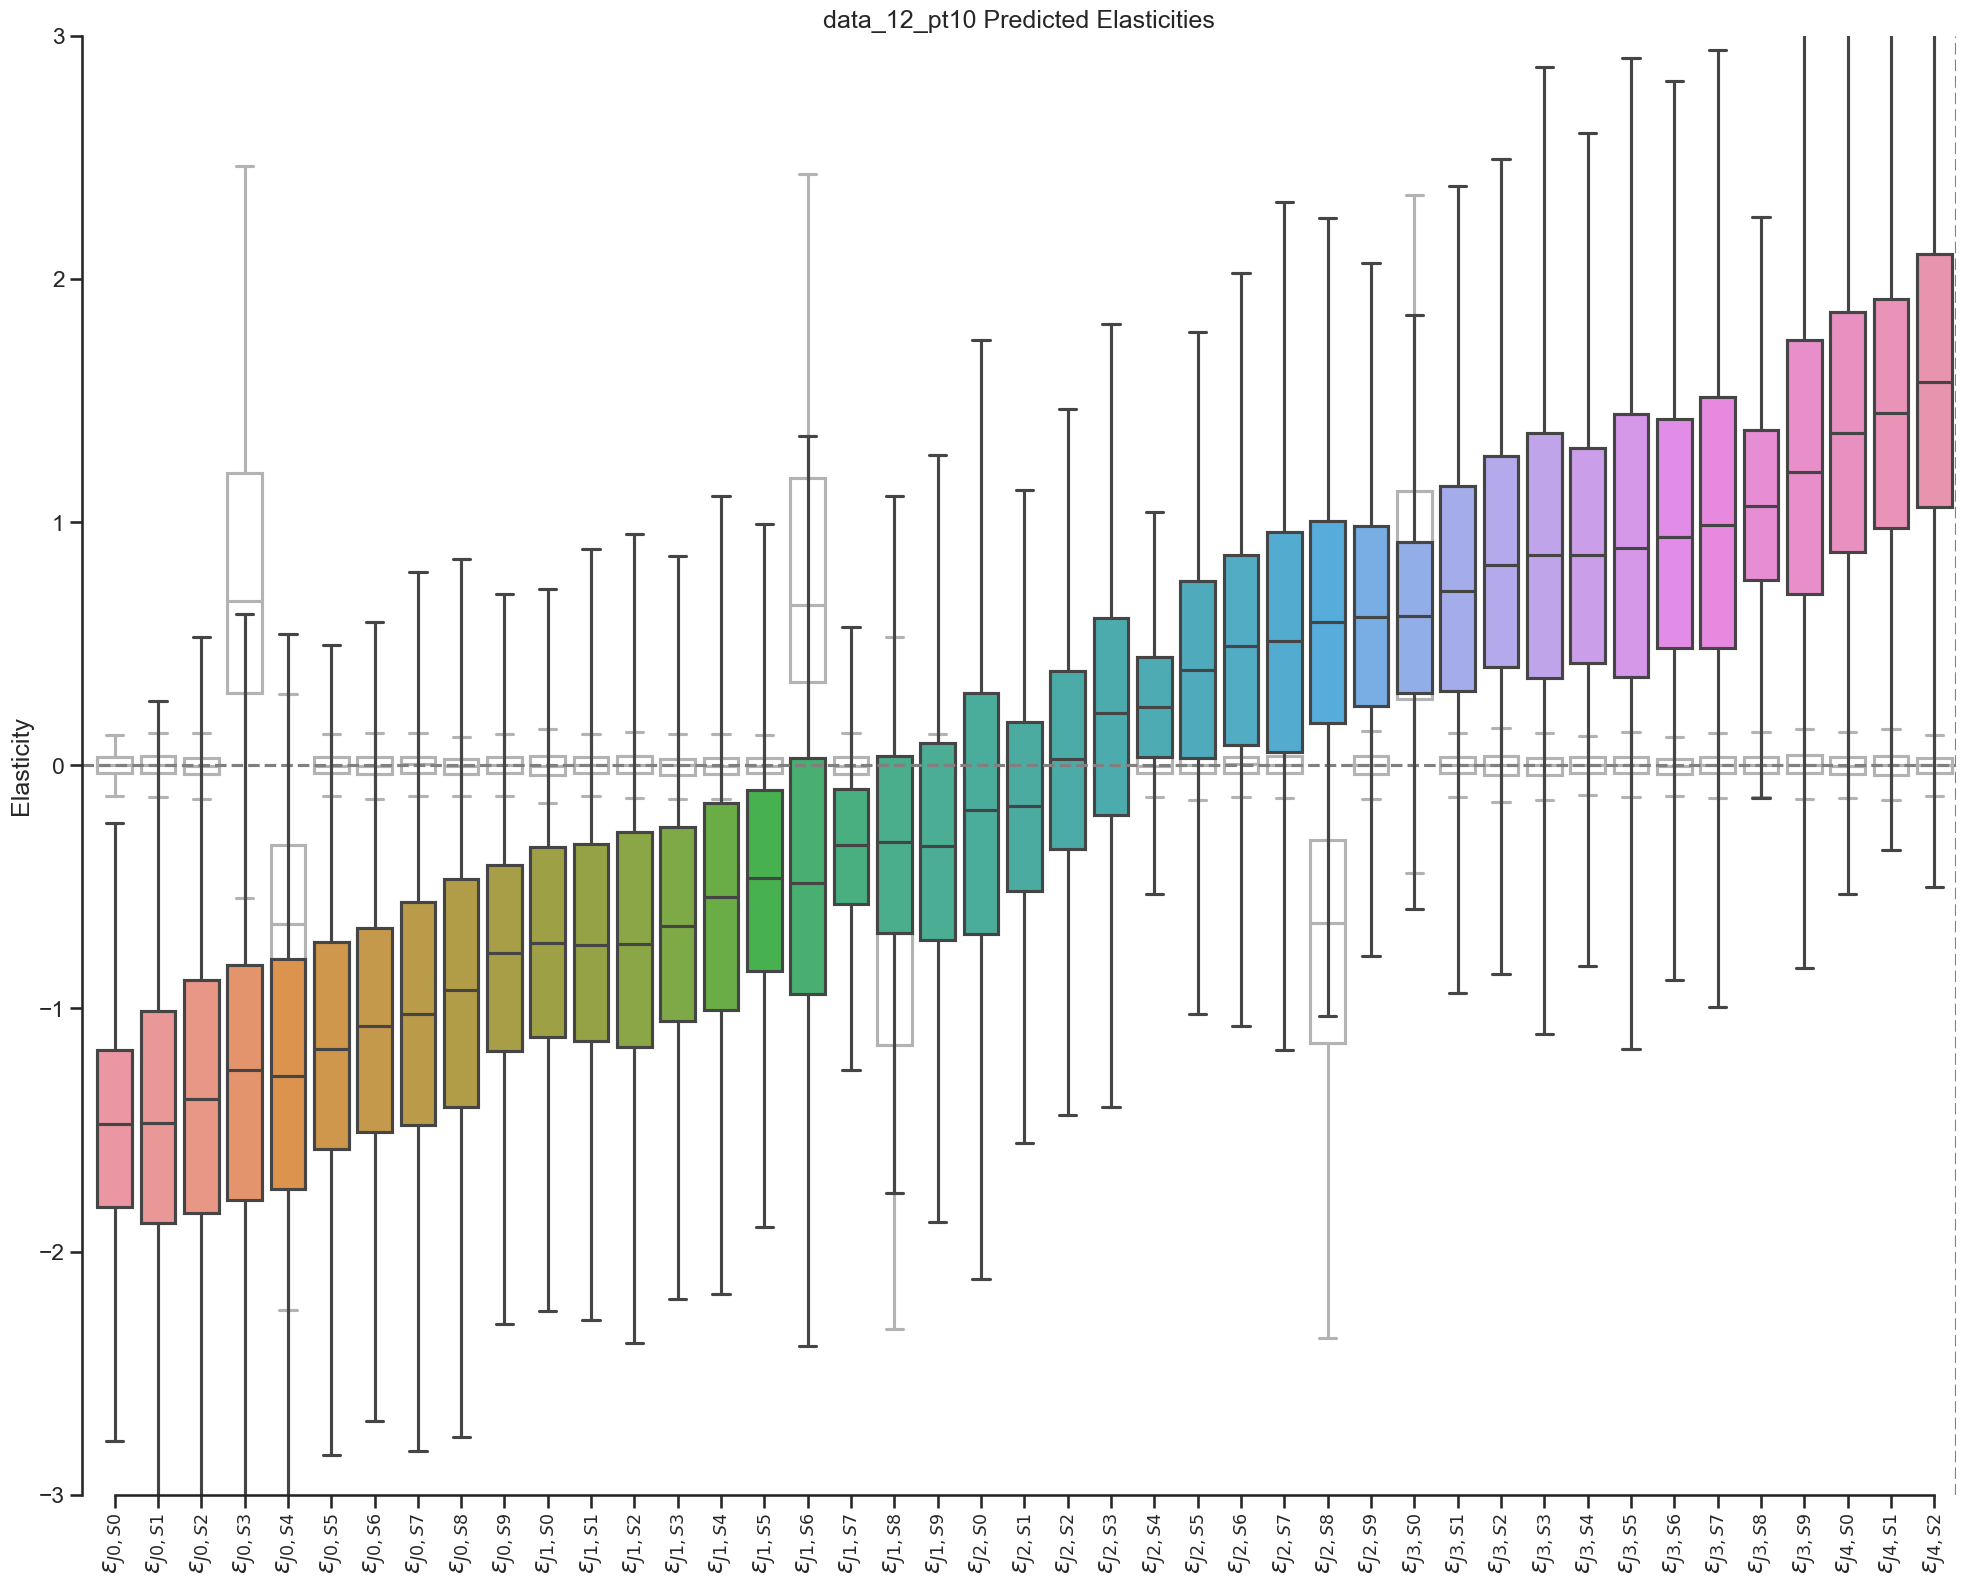

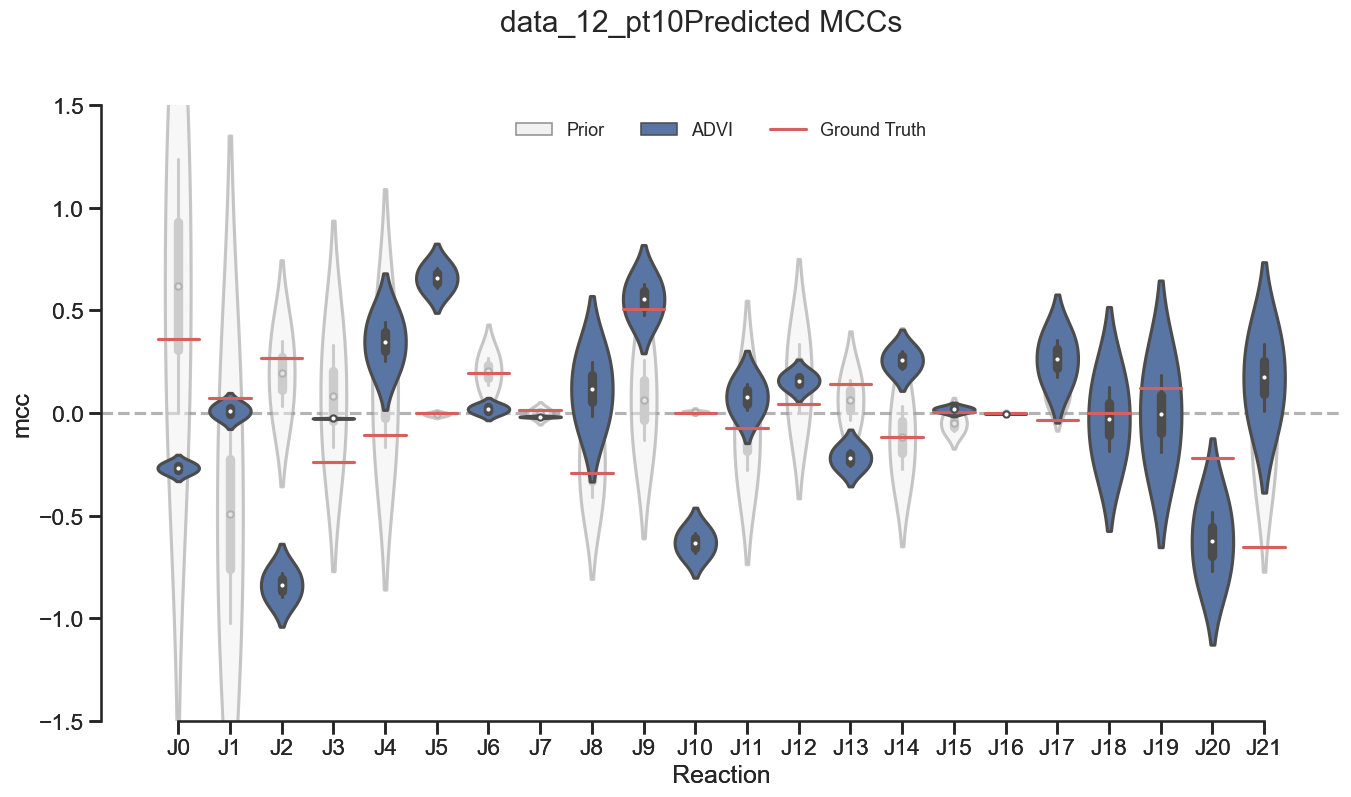

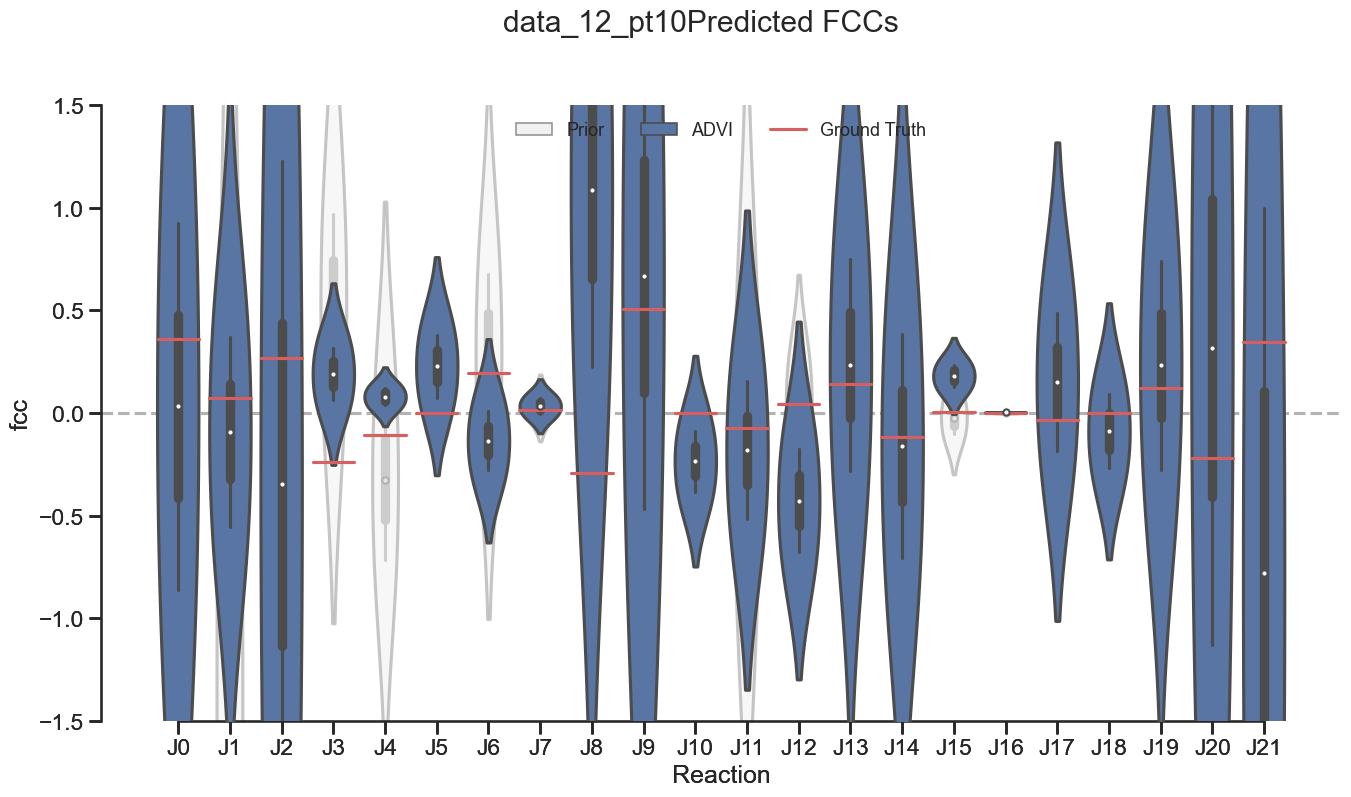

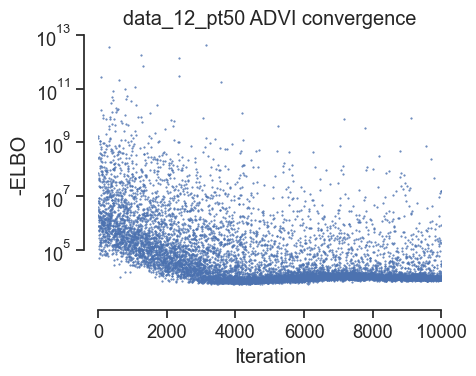

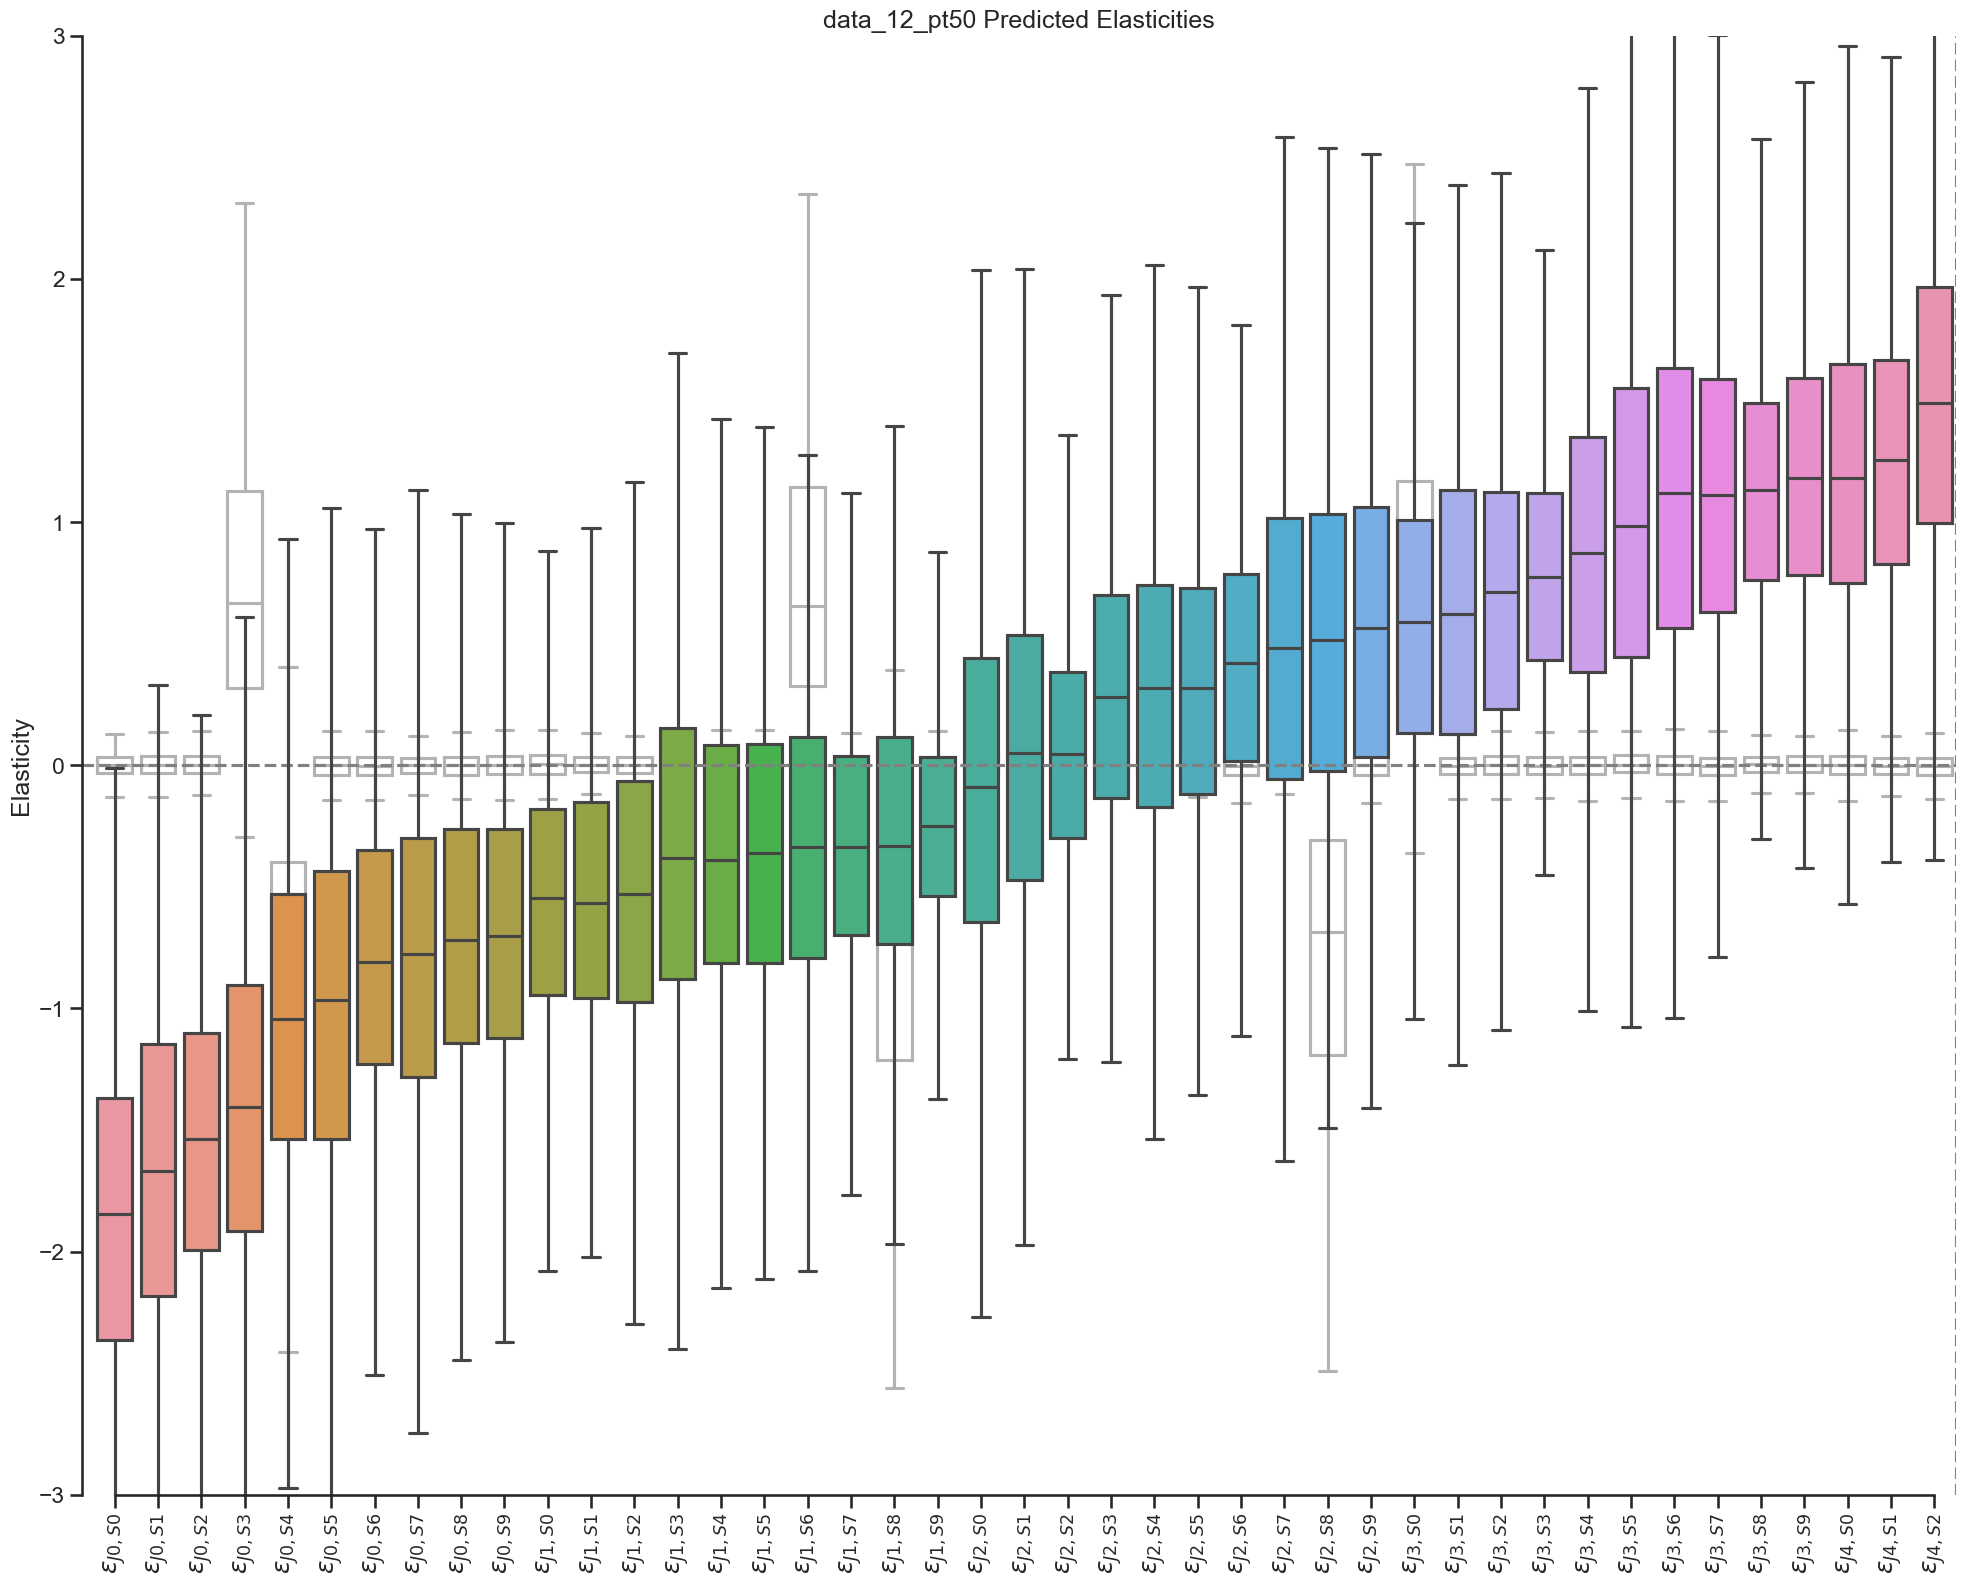

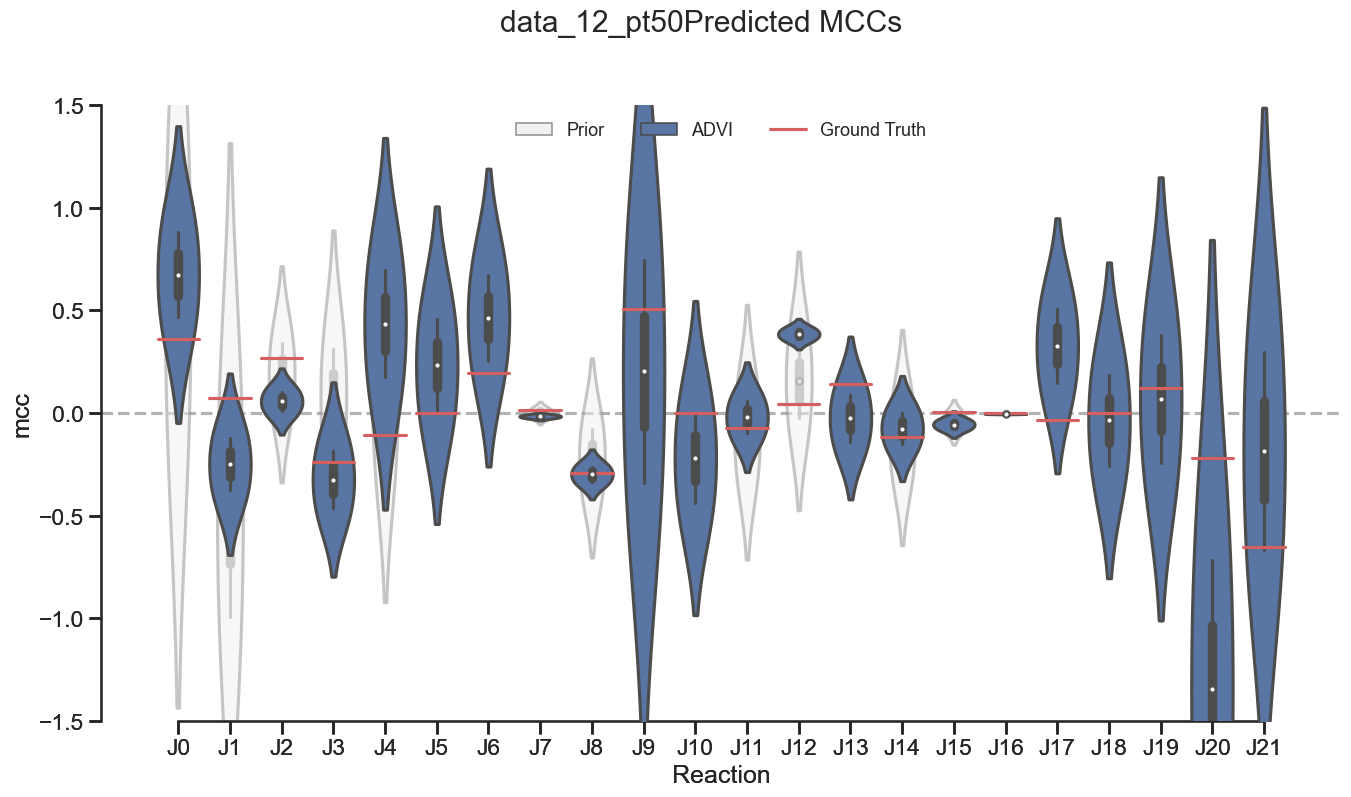

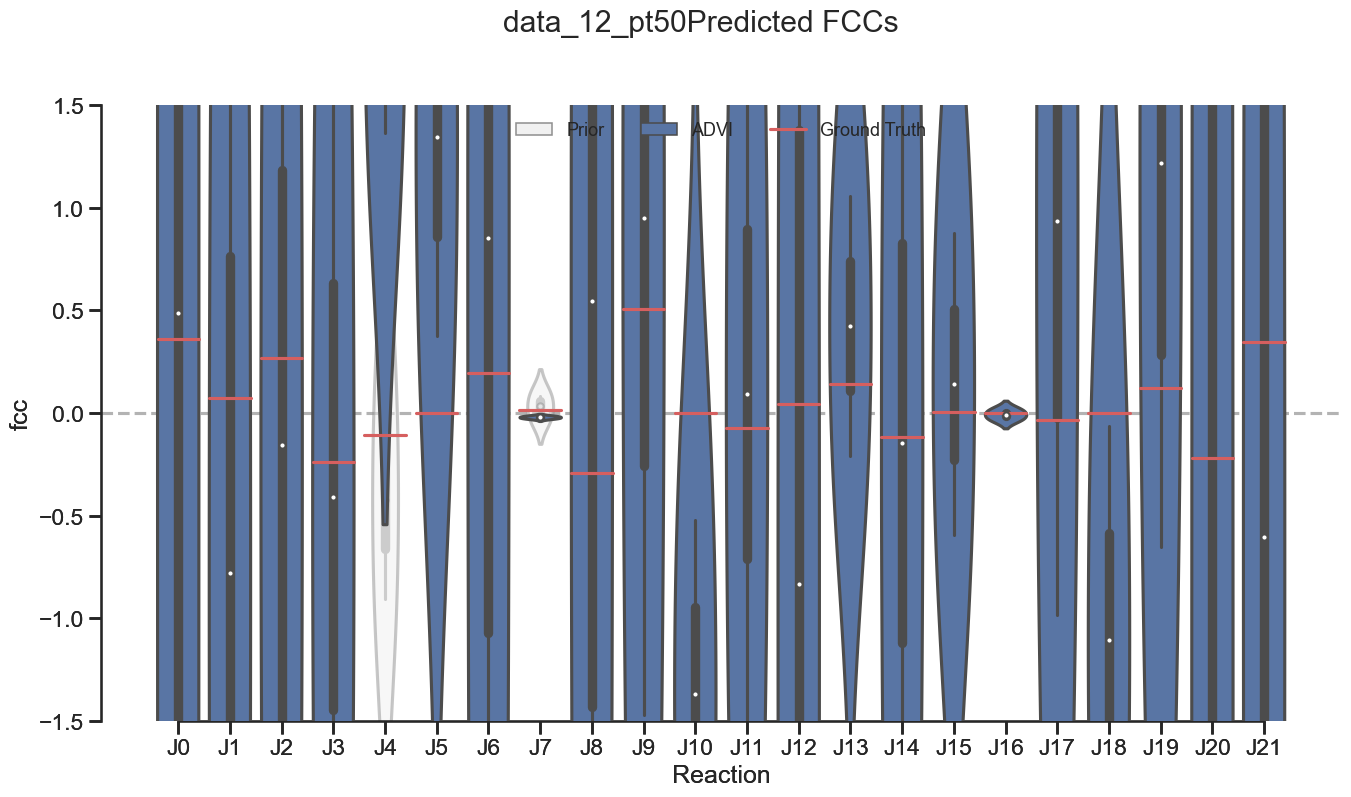

In [6]:
short = [['data_12_pt10.csv', 'data_12_pt50.csv']]
passN = 12
for data in short[0]: 
    path = f'test_{passN}.xml'
    bi.run_analysis(path, data, itr=ADVI_ITERATIONS, folder_name=FOLDER_NAME)
    # ba.labelData(r, model, FOLDER_NAME +  data)